In [32]:
import os
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [44]:
dists_fn = './output_data/dist.csv'
import pandas as pd
df = pd.read_csv(dists_fn)

df = df.loc[df.s != df.t]

In [79]:
df2 = pd.read_csv('./output_data/dist_old.csv')

In [82]:
df2.loc[df2.algo == 'bfs_bi_node_exact']

,graph,algo,seed,s,t,dist,time_dist,search_space
400,08blocks,bfs_bi_node_exact,3404785993,4,23,2,0.004608,6
401,08blocks,bfs_bi_node_exact,3404785993,9,32,2,0.001002,6
402,08blocks,bfs_bi_node_exact,3404785993,17,24,2,0.000951,6
403,08blocks,bfs_bi_node_exact,3404785993,12,5,2,0.000832,6
404,08blocks,bfs_bi_node_exact,3404785993,26,32,2,0.000841,6
...,...,...,...,...,...,...,...,...
2015995,wing_nodal,bfs_bi_node_exact,3404785993,2870,8809,12,0.125438,21765
2015996,wing_nodal,bfs_bi_node_exact,3404785993,9061,5268,13,0.122813,24879
2015997,wing_nodal,bfs_bi_node_exact,3404785993,2090,10140,13,0.095511,17910
2015998,wing_nodal,bfs_bi_node_exact,3404785993,3095,9533,10,0.061306,11509


In [85]:
temp = df2.loc[df2.algo == 'bfs_bi_node_exact'].search_space
temp2 = df.loc[df.algo == 'bfs_bi_node_exact'].search_space

temp

400            6
401            6
402            6
403            6
404            6
           ...  
2015995    21765
2015996    24879
2015997    17910
2015998    11509
2015999    23783
Name: search_space, Length: 403200, dtype: int64

In [95]:
len(np.where(temp - temp2 > 0)[0])

24616

In [99]:
a = temp - temp2
a

400        0.0
401        0.0
402        0.0
403        0.0
404        0.0
          ... 
2015995    NaN
2015996    NaN
2015997    NaN
2015998    NaN
2015999    NaN
Name: search_space, Length: 753535, dtype: float64

In [100]:
a[temp - temp2 > 0]

902          2.0
919         28.0
993          2.0
2444        40.0
2471         1.0
           ...  
631900    2218.0
631902    3638.0
632400      40.0
632401      21.0
632404     111.0
Name: search_space, Length: 24616, dtype: float64

In [101]:
len(temp)

403200

In [45]:
len(df.graph.unique())

4032

In [46]:
df.loc[(df.graph=='GD95_a') & (df.s == 29)]

,graph,algo,seed,s,t,dist,time_dist,search_space
657019,GD95_a,bfs,3404785993,29,28,2,0.000311,9
657052,GD95_a,bfs,3404785993,29,27,1,0.000301,3
657063,GD95_a,bfs,3404785993,29,24,3,0.000632,40
657096,GD95_a,bfs,3404785993,29,17,5,0.000942,95
657119,GD95_a,bfs_bi_balanced,3404785993,29,28,2,0.000711,5
657152,GD95_a,bfs_bi_balanced,3404785993,29,27,1,0.000631,2
657163,GD95_a,bfs_bi_balanced,3404785993,29,24,3,0.004879,13
657196,GD95_a,bfs_bi_balanced,3404785993,29,17,5,0.000812,17
657219,GD95_a,bfs_bi_always_swap,3404785993,29,28,2,0.000691,6
657252,GD95_a,bfs_bi_always_swap,3404785993,29,27,1,0.000601,3


In [47]:
2016000/4032

500.0

In [48]:
df.columns

Index(['graph', 'algo', 'seed', 's', 't', 'dist', 'time_dist', 'search_space'], dtype='object')

In [49]:
df.algo.unique()

array(['bfs', 'bfs_bi_balanced', 'bfs_bi_always_swap', 'bfs_bi_node',
       'bfs_bi_node_exact'], dtype=object)

In [26]:
temp = lambda algo: df.loc[(df.algo == algo) & (df.graph.isin(['08blocks', '1138_bus', '130bit', '145bit', '162bit', '176bit',
       '192bit', '208bit', '2D_27628_bjtcai', '2D_54019_highK']))]\
    .groupby(['graph', 's', 't']).dist.unique().apply(lambda x: x[0])

foo = temp('bfs_bi_balanced')
bar = temp('bfs_bi_node_exact')
baz = temp('bfs_bi_node')

In [29]:
graphs_small_first = sizes.sort_values('n').graph
graphs_small_first

1363                      Letter-med
38                          COIL-RAG
1362                     Letter-high
1265                     Fingerprint
5177    reptilia-tortoise-network-pv
                    ...             
5077                          pds-80
1945                         dbpedia
5310         soc-twitter-follows-mun
4943           munmun_twitter_social
1485       aff-dbpedia-users2country
Name: graph, Length: 5487, dtype: object

In [30]:
bad_graphs = []

for graph in tqdm(graphs_small_first):
    a = df.loc[(df.algo == 'bfs_bi_balanced') & (df.graph==graph)]\
    .groupby(['graph', 's', 't']).dist.unique().apply(lambda x: x[0])
    b = df.loc[(df.algo == 'bfs_bi_node_exact') & (df.graph==graph)]\
    .groupby(['graph', 's', 't']).dist.unique().apply(lambda x: x[0])
    if not np.all(a == b):
        bad_graphs.append(graph)
        print(graph)

    if len(bad_graphs) > 4:
        break

  1%|█▏                                                                                         | 71/5487 [00:10<13:14,  6.81it/s]


KeyboardInterrupt: 

In [15]:
bad_graphs

['Fingerprint',
 'reptilia-tortoise-network-pv',
 'reptilia-tortoise-network-cs',
 'DD_g714',
 'Hamrle1']

In [16]:
temp = lambda algo: df.loc[(df.algo == algo) & (df.graph.isin(bad_graphs))]\
    .groupby(['graph', 's', 't']).dist.unique().apply(lambda x: x[0])

foo = temp('bfs_bi_balanced')
bar = temp('bfs_bi_node_exact')
baz = temp('bfs_bi_node')

In [17]:
foo[foo != bar]

graph                         s   t 
DD_g714                       0   14    7
                                  28    4
                              2   22    8
                              3   11    9
                                  12    8
                                       ..
Hamrle1                       11  17    3
reptilia-tortoise-network-cs  27  9     4
                              28  8     4
reptilia-tortoise-network-pv  21  3     4
                                  17    6
Name: dist, Length: 80, dtype: int64

In [18]:
bar[foo!= bar]

graph                         s   t 
DD_g714                       0   14    4294967295
                                  28    4294967295
                              2   22    4294967295
                              3   11            10
                                  12    4294967295
                                           ...    
Hamrle1                       11  17             4
reptilia-tortoise-network-cs  27  9     4294967295
                              28  8     4294967295
reptilia-tortoise-network-pv  21  3     4294967295
                                  17    4294967295
Name: dist, Length: 80, dtype: int64

In [19]:
baz[foo != bar][:10]

graph    s  t 
DD_g714  0  14     7
            28     4
         2  22     8
         3  11     9
            12     8
            13     8
         4  21    11
         6  21     8
         7  21    12
            26     7
Name: dist, dtype: int64

In [37]:
sizes[sizes.graph.isin(bad_graphs)]

,graph,n,m
38,COIL-RAG,8,12
1265,Fingerprint,18,17
1362,Letter-high,9,9
1363,Letter-med,8,7
5177,reptilia-tortoise-network-pv,22,49


## Can we find a small graph?

In [53]:
sizes = pd.read_csv('./output_data/size.csv')

In [54]:
df = pd.merge(df, sizes, on='graph')

In [55]:
df

,graph,algo,seed,s,t,dist,time_dist,search_space,n,m
0,08blocks,bfs,3404785993,4,23,2,0.001673,40,38,73
1,08blocks,bfs,3404785993,9,32,2,0.000752,40,38,73
2,08blocks,bfs,3404785993,17,24,2,0.000642,40,38,73
3,08blocks,bfs,3404785993,12,5,2,0.000681,40,38,73
4,08blocks,bfs,3404785993,26,32,2,0.000621,40,38,73
...,...,...,...,...,...,...,...,...,...,...
2015720,wing_nodal,bfs_bi_node_exact,3404785993,2870,8809,12,0.125488,21765,10937,75488
2015721,wing_nodal,bfs_bi_node_exact,3404785993,9061,5268,13,0.123735,24879,10937,75488
2015722,wing_nodal,bfs_bi_node_exact,3404785993,2090,10140,13,0.096102,17910,10937,75488
2015723,wing_nodal,bfs_bi_node_exact,3404785993,3095,9533,10,0.062058,11509,10937,75488


## What is going on with DD_g714?

In [77]:
!pip install networkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 9.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 56.3 MB/s eta 0:00:0000:0100:01


In [78]:
import networkit as nk

In [98]:
g_fn = 'input_data/DD_g714'
with open(g_fn) as file:
    lines = list(map(lambda x: x[:-1].split(' '), file.readlines()))
    lines = [list(map(int, y)) for y in lines]

n, m = lines[0]
g = nk.Graph(n)
for _, u, v in lines[1:]:
    _ = g.addEdge(u, v)

def nhbs(u):
    return set(g.iterNeighbors(u))

In [104]:
nhbs(5)

{2, 23, 24, 26, 27}

In [105]:
nhbs(24)

{5, 20, 23, 25, 26, 27}

In [106]:
nhbs(17)

{10, 13, 16, 18, 19, 20}

In [107]:
nhbs(18)

{13, 16, 17, 19}

In [128]:
nhbs(13)

{9, 10, 12, 16, 17, 18}

In [129]:
nhbs(20)

{17, 19, 23, 24, 25}

In [21]:
import networkit as nk

g_fn = 'input_data/DD_g789'
with open(g_fn) as file:
    lines = list(map(lambda x: x[:-1].split(' '), file.readlines()))
    lines = [list(map(int, y)) for y in lines]

n, m = lines[0]
g = nk.Graph(n)
for _, u, v in lines[1:]:
    _ = g.addEdge(u, v)

def nhbs(u):
    return set(g.iterNeighbors(u))

In [22]:
nhbs(22)

{6, 20, 30}

In [23]:
nhbs(30)

{20, 22, 23, 28}

In [44]:
import networkit as nk

g_fn = 'input_data/GD95_a'
with open(g_fn) as file:
    lines = list(map(lambda x: x[:-1].split(' '), file.readlines()))
    lines = [list(map(int, y)) for y in lines]

n, m = lines[0]
g = nk.Graph(n)
for _, u, v in lines[1:]:
    _ = g.addEdge(u, v)

def nhbs(u):
    return set(g.iterNeighbors(u))

In [46]:
nhbs(12)

{10, 18, 26, 27, 28, 29}

In [47]:
nhbs(27)

{11, 12, 29, 32}

## Ok let's look again at dists

In [56]:
df.shape

(2015725, 10)

In [57]:
df.graph.unique()

array(['08blocks', '1138_bus', '130bit', ..., 'webkb-wisc', 'wing',
       'wing_nodal'], dtype=object)

In [64]:
len(df.graph.unique())

4032

In [65]:
# For graph of m edges, let m_search_space be the number of things searched.
# In bfs_node this is simply the number of nodes added to the queue.
# we find x s.t. m^x = m_search_space

df['exponent'] = df.apply(lambda row: math.log(row['search_space'], row['m']), axis=1)

In [66]:
df

,graph,algo,seed,s,t,dist,time_dist,search_space,n,m,exponent
0,08blocks,bfs,3404785993,4,23,2,0.001673,40,38,73,0.859787
1,08blocks,bfs,3404785993,9,32,2,0.000752,40,38,73,0.859787
2,08blocks,bfs,3404785993,17,24,2,0.000642,40,38,73,0.859787
3,08blocks,bfs,3404785993,12,5,2,0.000681,40,38,73,0.859787
4,08blocks,bfs,3404785993,26,32,2,0.000621,40,38,73,0.859787
...,...,...,...,...,...,...,...,...,...,...,...
2015720,wing_nodal,bfs_bi_node_exact,3404785993,2870,8809,12,0.125488,21765,10937,75488,0.889272
2015721,wing_nodal,bfs_bi_node_exact,3404785993,9061,5268,13,0.123735,24879,10937,75488,0.901177
2015722,wing_nodal,bfs_bi_node_exact,3404785993,2090,10140,13,0.096102,17910,10937,75488,0.871915
2015723,wing_nodal,bfs_bi_node_exact,3404785993,3095,9533,10,0.062058,11509,10937,75488,0.832542


In [61]:
df.loc[df.algo == 'bfs'].groupby('graph').exponent.describe()

,count,mean,std,min,25%,50%,75%,max
graph,,,,,,,,
08blocks,100.0,0.804734,0.173443,0.256059,0.859787,0.859787,0.859787,0.859787
1138_bus,100.0,0.942097,0.128603,0.575121,0.881669,0.980231,1.040054,1.094252
130bit,100.0,0.705648,0.115526,0.294513,0.665078,0.699985,0.765403,0.948338
145bit,100.0,0.704932,0.114904,0.274967,0.671447,0.709393,0.775489,0.910255
162bit,100.0,0.765783,0.068884,0.561318,0.714608,0.759536,0.808742,0.947935
...,...,...,...,...,...,...,...,...
web-spam-detection,100.0,0.739578,0.131266,0.522451,0.634274,0.695543,0.834113,1.040366
web-webbase-2001,100.0,0.976296,0.082934,0.701914,0.924217,1.013443,1.036988,1.068120
webkb-wisc,100.0,0.875247,0.143072,0.263443,0.796749,0.845679,0.971709,1.104871


In [62]:
import seaborn as sns

In [67]:
graphs = df.graph.unique()
girgs = [g for g in graphs if 'girg' in g]
girgs[:10]

chunglus = [g for g in graphs if 'cl_n' in g]
chunglus[:10]

ers = [g for g in graphs if 'er_n' in g]
ers[:10]

real_graphs = set(graphs) - set(girgs) - set(chunglus) - set(ers)

['girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=321',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=321_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=356',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=356_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=489',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=489_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=64',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=64_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=836',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=836_square']

['cl_n=50000_deg=10_ple=2.1_seed=321',
 'cl_n=50000_deg=10_ple=2.1_seed=356',
 'cl_n=50000_deg=10_ple=2.1_seed=489',
 'cl_n=50000_deg=10_ple=2.1_seed=64',
 'cl_n=50000_deg=10_ple=2.1_seed=836',
 'cl_n=50000_deg=10_ple=2.25_seed=321',
 'cl_n=50000_deg=10_ple=2.25_seed=356',
 'cl_n=50000_deg=10_ple=2.25_seed=489',
 'cl_n=50000_deg=10_ple=2.25_seed=64',
 'cl_n=50000_deg=10_ple=2.25_seed=836']

['er_n=50000_m=250000_seed=321',
 'er_n=50000_m=250000_seed=356',
 'er_n=50000_m=250000_seed=489',
 'er_n=50000_m=250000_seed=64',
 'er_n=50000_m=250000_seed=836']

In [68]:
foo = df.graph.unique()[:5]

<AxesSubplot:xlabel='graph', ylabel='exponent'>

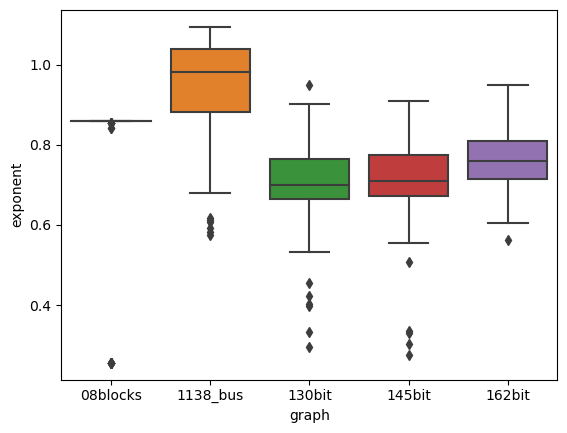

In [69]:
sns.boxplot(data=df.loc[(df.algo == 'bfs') & (df.graph.isin(foo))], x='graph', y='exponent')

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='algo', ylabel='exponent'>

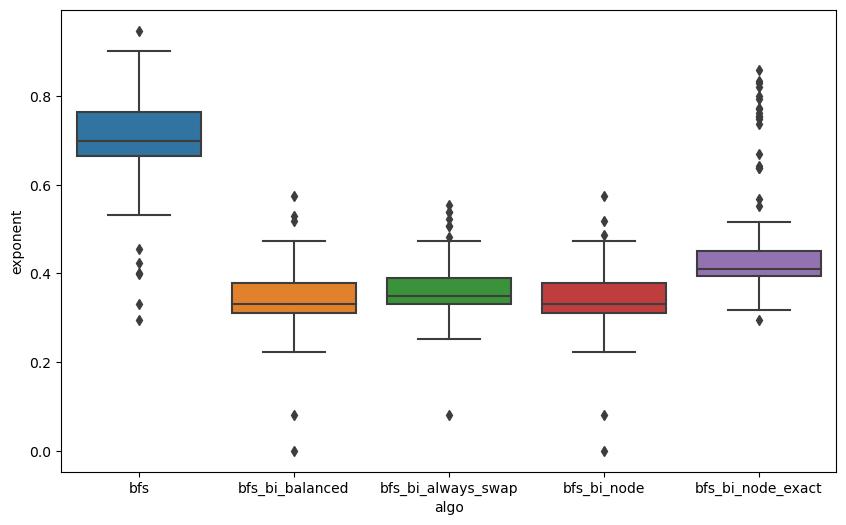

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.loc[(df.graph == '130bit')], x='algo', y='exponent')

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='algo', ylabel='exponent'>

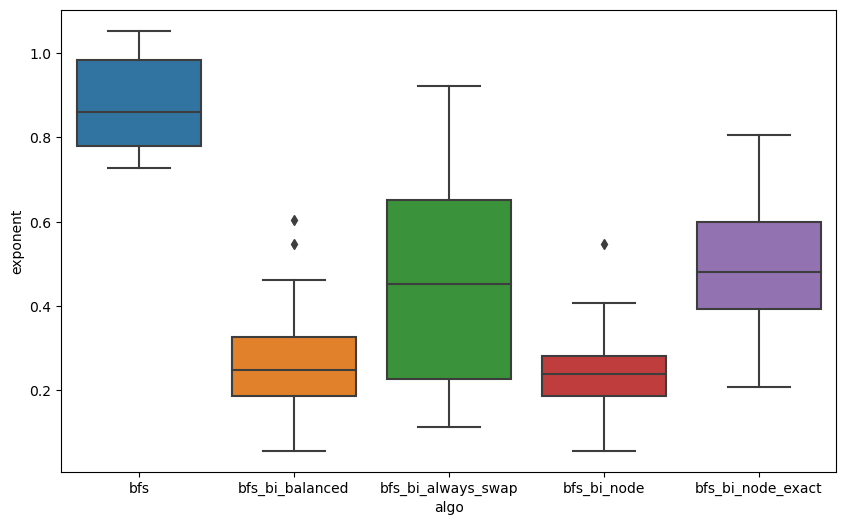

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.loc[(df.graph == 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=321')], x='algo', y='exponent')

<AxesSubplot:xlabel='algo', ylabel='exponent'>

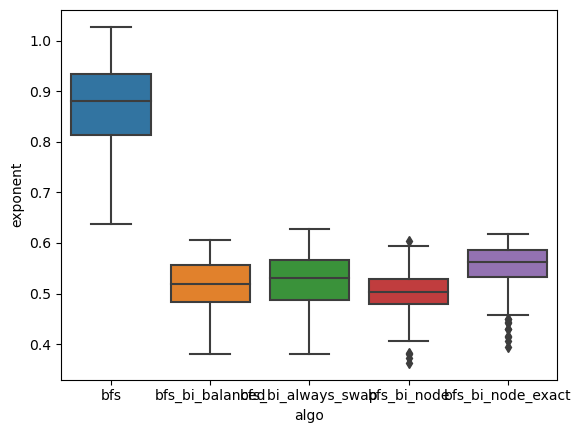

In [72]:
sns.boxplot(data=df.loc[(df.graph == 'girg_n=50000_deg=10_dim=2_ple=5.1_T=0.9999_seed=321')], x='algo', y='exponent')

In [73]:
med_exps = df.groupby(['graph', 'algo']).exponent.median()
med_exps

graph       algo              
08blocks    bfs                   0.859787
            bfs_bi_always_swap    0.323111
            bfs_bi_balanced       0.323111
            bfs_bi_node           0.323111
            bfs_bi_node_exact     0.417615
                                    ...   
wing_nodal  bfs                   0.985030
            bfs_bi_always_swap    0.870629
            bfs_bi_balanced       0.861929
            bfs_bi_node           0.859601
            bfs_bi_node_exact     0.865791
Name: exponent, Length: 20160, dtype: float64

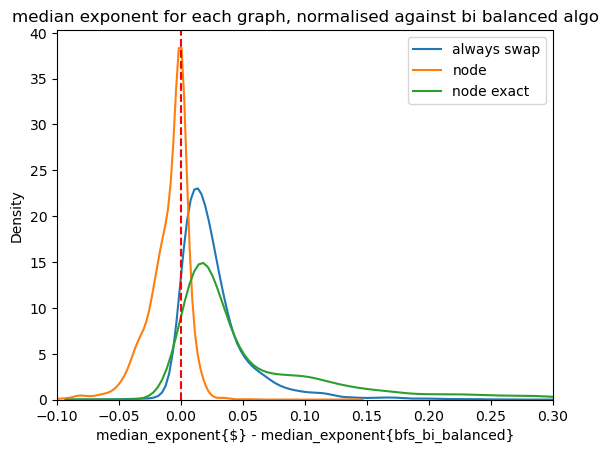

In [74]:
_ = sns.kdeplot(med_exps[:, 'bfs_bi_always_swap'] - med_exps[:, 'bfs_bi_balanced'], label='always swap')
_ = sns.kdeplot(med_exps[:, 'bfs_bi_node'] - med_exps[:, 'bfs_bi_balanced'], label='node')
_ = sns.kdeplot(med_exps[:, 'bfs_bi_node_exact'] - med_exps[:, 'bfs_bi_balanced'], label='node exact')
_ = plt.legend()
_ = plt.axvline(0, color='r', linestyle='--')
_ = plt.xlim(-0.1, 0.3)  # NB CUTTING OFF
_ = plt.xlabel('median_exponent{$} - median_exponent{bfs_bi_balanced}')
_ = plt.title('median exponent for each graph, normalised against bi balanced algo')

In [75]:
df.groupby(['graph', 'algo']).exponent.median()

graph       algo              
08blocks    bfs                   0.859787
            bfs_bi_always_swap    0.323111
            bfs_bi_balanced       0.323111
            bfs_bi_node           0.323111
            bfs_bi_node_exact     0.417615
                                    ...   
wing_nodal  bfs                   0.985030
            bfs_bi_always_swap    0.870629
            bfs_bi_balanced       0.861929
            bfs_bi_node           0.859601
            bfs_bi_node_exact     0.865791
Name: exponent, Length: 20160, dtype: float64

In [76]:
med_exp_real = df.loc[df.graph.isin(real_graphs)].groupby(['graph', 'algo']).exponent.median()

In [77]:
print('Mean of (median exponent over 100 pairs) over graphs:')
print('GIRGs')
for algo in df.algo.unique():
    print(f"{algo}: {med_exps[girgs][:, algo].mean():.3f}")

print()
print('Real networks')
for algo in df.algo.unique():
    print(f"{algo}: {med_exps[real_graphs][:, algo].mean():.3f}")



Mean of (median exponent over 100 pairs) over graphs:
GIRGs
bfs: 0.912
bfs_bi_balanced: 0.498
bfs_bi_always_swap: 0.537
bfs_bi_node: 0.480
bfs_bi_node_exact: 0.588

Real networks
bfs: 0.918
bfs_bi_balanced: 0.691
bfs_bi_always_swap: 0.716
bfs_bi_node: 0.684
bfs_bi_node_exact: 0.735


/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_9903/2165140417.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"{algo}: {med_exps[real_graphs][:, algo].mean():.3f}")
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_9903/2165140417.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"{algo}: {med_exps[real_graphs][:, algo].mean():.3f}")
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_9903/2165140417.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"{algo}: {med_exps[real_graphs][:, algo].mean():.3f}")
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_9903/2165140417.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"{algo}: {med_exps[real

In [118]:
print('Mean of (median exponent over 100 pairs) over graphs:')
print('GIRGs')
for algo in df.algo.unique():
    print(f"{algo}: {med_exps[girgs][:, algo].mean():.3f}")

print()
print('Real networks')
for algo in df.algo.unique():
    print(f"{algo}: {med_exps[real_graphs][:, algo].mean():.3f}")



Mean of (median exponent over 100 pairs) over graphs:
GIRGs
bfs: 0.912
bfs_bi_balanced: 0.498
bfs_bi_always_swap: 0.537
bfs_bi_node: 0.480
bfs_bi_node_exact: 0.588

Real networks
bfs: 0.918
bfs_bi_balanced: 0.691
bfs_bi_always_swap: 0.716
bfs_bi_node: 0.684
bfs_bi_node_exact: 0.735


/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_26630/2165140417.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"{algo}: {med_exps[real_graphs][:, algo].mean():.3f}")
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_26630/2165140417.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"{algo}: {med_exps[real_graphs][:, algo].mean():.3f}")
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_26630/2165140417.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"{algo}: {med_exps[real_graphs][:, algo].mean():.3f}")
/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_26630/2165140417.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"{algo}: {med_exps[

In [108]:
med_exp_real[:, 'bfs_bi_node'].mean()
med_exp_real[:, 'bfs_bi_balanced'].mean()

0.6835947968917064

0.6914490448039788

In [100]:
med_exps.loc[]